In [3]:
import tensorflow
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
zip_file=keras.utils.get_file(
    fname="gamma_angle_position_5deg_xy.h5",
    origin="https://zenodo.org/record/846388/files/gamma_angle_position_5deg_xy.h5?download=1",
    extract=True

)
dirnam=os.path.join(os.path.dirname(zip_file), "gamma_angle_position_5deg_xy.h5")

import h5py
zip_file


'C:\\Users\\Asus\\.keras\\datasets\\gamma_angle_position_5deg_xy.h5'

'C:\\Users\\Asus\\.keras\\datasets\\gamma_angle_position_5deg_xy.h5'

In [4]:
import matplotlib.pyplot as plt
def extract_data(n):
  windows=np.empty((12,12,1))
  for i in range(n):
    window = (np.array(h5py.File(zip_file)["layer_1"][i]))
    #print(window.reshape(1,12,12).shape)
    #window=window.reshape(1,12,12)
    windows=np.dstack((windows, window))
  return windows
  

In [5]:


x=h5py.File(zip_file)
layer_0_data = (np.array(h5py.File(zip_file)["layer_0"][:]))

layer_1_data = (np.array(h5py.File(zip_file)["layer_1"][:]))
layer_2_data = (np.array(h5py.File(zip_file)["layer_2"][:]))
energy=(np.array(h5py.File(zip_file)["energy"]))
energy=energy.reshape(energy.shape[0])
nrm_l0=np.max(layer_0_data)
nrm_l1=np.max(layer_1_data)
nrm_l2=np.max(layer_2_data)
nrm_e=np.max(energy)

Layer_0_data_preprocessed=layer_0_data/nrm_l0
Layer_1_data_preprocessed=layer_1_data/nrm_l1
Layer_2_data_preprocessed=layer_2_data/nrm_l2
energy = energy / nrm_e


In [6]:
Layer_0_data_preprocessed

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 2.40711802e-07, 2.90011534e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.44887283e-06, 1.92491792e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.32958062e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.24407611e-05, 1.08539811e-04, 1.65105335e-07]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.25305227e-04, ...,
         4.21652981e-05, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e

In [7]:
flatten_layer_0=Layer_0_data_preprocessed.reshape(500000,3*96)
flatten_layer_1=Layer_1_data_preprocessed.reshape(500000,12*12)
flatten_layer_2=Layer_2_data_preprocessed.reshape(500000,6*12)
from random import randint

labels=list(range(500000))




#random_selection=np.array([x for x in range (500000) if x not in random])

for i in range(int(0.6*len(flatten_layer_0))):
  n=randint(0,499999)
  random.append(n)
  train_labels.append(energy[n])
  train_layer_0.append(flatten_layer_0[n])
  train_layer_1.append(flatten_layer_1[n])
  train_layer_2.append(flatten_layer_2[n])

In [8]:
from sklearn.model_selection import train_test_split
layer_0_train, layer_0_test, energy_train, energy_test,  layer_1_train,layer_1_test, layer_2_train, layer_2_test,= train_test_split(flatten_layer_0,  energy, flatten_layer_1, flatten_layer_2,  test_size=0.4, random_state=42)
layer_0_train_2D, layer_0_test_2D, energy_train, energy_test,  layer_1_train_2D,layer_1_test_2D, layer_2_train_2D, layer_2_test2D,= train_test_split(Layer_0_data_preprocessed,  energy, Layer_1_data_preprocessed, Layer_2_data_preprocessed,  test_size=0.4, random_state=42)

In [9]:
print(layer_0_train_2D.shape)

(300000, 3, 96)



def check_data(n):
  x=layer_0_train[n].sum()*np.max(layer_0_data)+layer_1_train[n].sum()*np.max(layer_1_data)+layer_2_train[n].sum()*np.max(layer_2_data)
  n=label0_train[n]
  print(x,energy[n])
check_data(5)

lbl_tr ==> labels of training

lbl_val==>labels of validation

l0_tr, l1_tr, l2_tr will be used in training and are chosen from previously splitted training data

l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val= train_test_split(layer_0_train,layer_1_train,layer_2_train, label0_train, test_size=0.2, random_state=42)
del(l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val)

In [10]:

lc1_test=np.array([np.concatenate((layer_0_test, layer_1_test, layer_2_test),axis=1)  ])
lc1_train=np.array([np.concatenate((layer_0_train, layer_1_train, layer_2_train),axis=1)  ])
lc1_train=lc1_train.reshape(lc1_train.shape[1],lc1_train.shape[2])
lc1_test=lc1_test.reshape(lc1_test.shape[1],lc1_test.shape[2])


In [11]:
print(lc1_test.shape) 
print(energy_test.shape)
print(lc1_train.shape)
print(energy_train.shape) 

(200000, 504)
(200000,)
(300000, 504)
(300000,)


test_layer_0 = np.array([flatten_layer_0[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_1 = np.array([flatten_layer_1[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_2 = np.array([flatten_layer_2[i] for i in range(len(flatten_layer_0)) if i not in random])

In [93]:
def run_experiment(model, x_train, y_train):
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.003),
        loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")#,
        #metrics=tf.keras.metrics.BinaryAccuracy(),
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="loss", patience=50, restore_best_weights=True
    )
    
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=3,
        batch_size=2028,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return history

In [15]:
import keras.layers as layers
import tensorflow as tf
hidden_units = [512, 256,64]
def dnn(hidden_units, num_classes, dropout_rate):
    inputs = layers.Input(shape=(144+(96*3)+72,), name="input_features")
    x = inputs
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="dnn")


baseline_model = dnn(hidden_units, 1, 0.1)
baseline_model.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 504)]            0         
                                                                 
 dense (Dense)               (None, 512)               258560    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0       

In [16]:
def cnn(hidden_units, num_classes, dropout_rate):
    inputs0 = layers.Input(shape=(3,96,1,), name="input_features_l0")
    inputs1 = layers.Input(shape=(12,12,1,), name="input_features_l1")
    inputs2 = layers.Input(shape=(12,6,1,), name="input_features_l2")
    cnn0 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs0)
    cnn0 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn0)
    cnn0 = layers.Flatten()(cnn0)
    cnn1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs1)
    cnn1 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn1)
    cnn1 = layers.Flatten()(cnn1)
    cnn2 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs2)
    cnn2 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn2)  
    cnn2 = layers.Flatten()(cnn2)
    x =  layers.Concatenate()([cnn0,cnn1,cnn2])
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=(inputs0,inputs1,inputs2), outputs=logits, name="dnn")

In [17]:
cnn_model = cnn(hidden_units, 1, 0.1)
cnn_model.summary()


Model: "dnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features_l0 (InputLayer)  [(None, 3, 96, 1)]  0           []                               
                                                                                                  
 input_features_l1 (InputLayer)  [(None, 12, 12, 1)]  0          []                               
                                                                                                  
 input_features_l2 (InputLayer)  [(None, 12, 6, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 96, 32)    320         ['input_features_l0[0][0]']      
                                                                                                

In [94]:
history_cnn=run_experiment(cnn_model,[layer_0_train_2D,layer_1_train_2D,layer_2_train_2D],energy_train)

Epoch 1/3
119/119 [==============================] - 258s 2s/step - loss: 0.0044 - val_loss: 0.0046
Epoch 2/3
119/119 [==============================] - 218s 2s/step - loss: 0.0019 - val_loss: 0.0047
Epoch 3/3
119/119 [==============================] - 218s 2s/step - loss: 0.0017 - val_loss: 0.0023


In [95]:
CNN_predict = cnn_model.predict(x=[layer_0_test_2D,layer_1_test_2D,layer_2_test2D], verbose=0)

In [22]:
x_train=lc1_train

y_train=energy_train
x=run_experiment(baseline_model, x_train, y_train)

Epoch 1/50
235/235 [==============================] - 6s 25ms/step - loss: 0.0031 - val_loss: 2.5392e-04
Epoch 2/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0016 - val_loss: 1.6284e-04
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0017 - val_loss: 2.9717e-04
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0017 - val_loss: 1.7601e-04
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0017 - val_loss: 3.7682e-04
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0017 - val_loss: 1.5682e-04
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0017 - val_loss: 6.3120e-04
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0017 - val_loss: 2.2104e-04
Epoch 9/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0016 - val_loss: 6.4041e-04
Epoch 10/50
235/235 [==============================] - 

In [23]:
def check_data(n):
  x=np.sum(layer_0_test[n])*nrm_l0+np.sum(layer_1_test[n])*nrm_l1+np.sum(layer_2_test[n])*nrm_l2
  y=energy_test[n]*nrm_e*1000
  print(x,y)
check_data(5)



10097.97740604293 10205.808976085407


In [24]:
layer_0_train.shape


(300000, 288)

In [96]:
def display_learning_curves(history):
    fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("loss")
    plt.ylim(top  = 0.0001, bottom = 0.0)
 #   ax2.plot(history.history["loss"])
 #   ax2.plot(history.history["mse"])
 #   ax2.legend(["train", "test"], loc="upper right")
 #   ax2.set_xlabel("Epochs")
 #   ax2.set_ylabel("loss")
    plt.show()


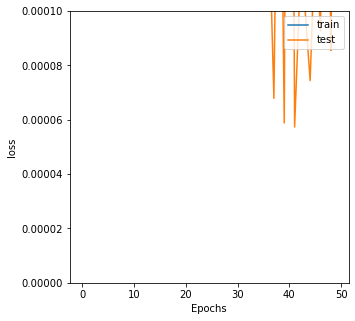

In [99]:
display_learning_curves(x)

In [26]:
label_predict = baseline_model.predict(x=lc1_test, verbose=0)

(array([5879., 2466., 2389., 2370., 2423., 2375., 2333., 2332., 2355.,
        2373., 2328., 2425., 2391., 2356., 2191., 2212., 2049., 1879.,
        1800., 1695., 2306., 2091., 1814., 1709., 1478., 1408., 1318.,
        1801., 1919., 1747., 1724., 1553., 1724., 1612., 1486., 1395.,
        1518., 1419., 2316., 2424., 2257., 2179., 2058., 2032., 2018.,
        2151., 2027., 2050., 2067., 2029., 2006., 2034., 2063., 2083.,
        2080., 2020., 2016., 2013., 2011., 2084., 2027., 2080., 2058.,
        2000., 2017., 2022., 2042., 2030., 2063., 2057., 2017., 1976.,
        1977., 1982., 2082., 2012., 2064., 2013., 1993., 2058., 1922.,
        2080., 1998., 1970., 2009., 2028., 2023., 2076., 2082., 1984.,
        2083., 2024., 2011., 2096., 1994., 1971., 1713.,  611.,   85.,
           9.]),
 array([0.02938208, 0.03914894, 0.0489158 , 0.05868267, 0.06844953,
        0.0782164 , 0.08798326, 0.09775012, 0.10751698, 0.11728384,
        0.12705071, 0.13681757, 0.14658444, 0.1563513 , 0.16611816

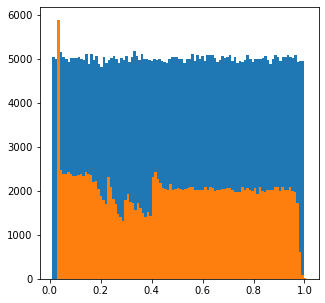

In [27]:
energy = np.array(energy)
label_predict = np.array(label_predict)
fig, ax = plt.subplots(1,1,figsize=[5,5])

ax.hist(energy,bins= 100) 
ax.hist(label_predict,bins= 100) 


In [100]:
label_predict = label_predict.reshape(label_predict.shape[0])
energy_cut  = 0 / (nrm_e * 1000)
diff_pred = (label_predict[energy_test>energy_cut] - energy_test[energy_test>energy_cut])/ energy_test[energy_test>energy_cut]
diff_sum = (np.sum(layer_0_test[energy_test>energy_cut],axis=1)*nrm_l0+np.sum(layer_1_test[energy_test>energy_cut],axis=1)*nrm_l1+np.sum(layer_2_test[energy_test>energy_cut],axis=1)*nrm_l2 - energy_test[energy_test>energy_cut]*nrm_e*1000 + 0.0068*energy_test[energy_test>energy_cut]*nrm_e*1000)/(energy_test[energy_test>energy_cut]*nrm_e*1000)
print(np.argmin(diff_sum))
print(np.sum(diff_sum>0))

print(np.std(diff_pred))
print(np.std(diff_sum))
print(np.mean(diff_pred))
print(np.mean(diff_sum))

104028
145430
0.1286134271592536
0.012249898073222111
-0.02961316627604381
-6.856688916029345e-06


In [113]:

def check_predict(n):
    print(CNN_predict[n], energy_test[n], (diff_sum[n]*energy_test[n]*nrm_e+energy_test[n]*nrm_e)/100)
check_predict(20)

[0.12222305] 0.11433707755961368 0.11397373110548398


In [103]:
Cnn_nparr=np.array([CNN_predict]).reshape(200000)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.00

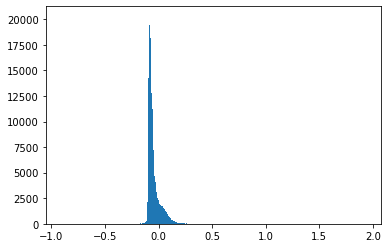

In [104]:
cnn_predict=(Cnn_nparr[energy_test>energy_cut]-energy_test[energy_test>energy_cut])/energy_test[energy_test>energy_cut]
plt.hist(cnn_predict, bins=500)

In [114]:
cnn_ext=np.mean(cnn_predict)-np.mean(diff_pred)
cnn_predict_mod=cnn_predict-cnn_ext

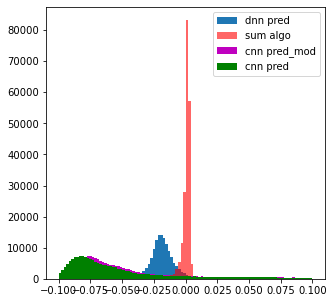

In [116]:
fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.hist(diff_pred, bins = 100, range=[-0.1,0.1], label = "dnn pred") 
ax.hist(diff_sum, alpha = 0.6, bins = 100, range=[-0.1,0.1], label = "sum algo", color="r")
ax.hist(cnn_predict_mod,  bins = 100, range=[-0.1,0.1],color="m", label = "cnn pred_mod")
ax.hist(cnn_predict,  bins = 100, range=[-0.1,0.1],color="g", label = "cnn pred") 
ax.legend()